In [1]:
import altair as alt
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns
from typing import List, Union

color = sns.color_palette()

# Load Stock Data

In [2]:
stock_tickers = ['dji', 'gspc']
stocks = {ticker: pd.read_json(f"../data/{ticker}_data.json") for ticker in stock_tickers}

In [3]:
stocks['dji'].head()

,date,open,high,low,close,adj_close,volume
0,2020-01-03,28553.33,28716.31,28500.36,28634.88,28634.88,2395900
1,2020-01-06,28465.50,28708.02,28418.63,28703.38,28703.38,2527600
2,2020-01-07,28639.18,28685.50,28565.28,28583.68,28583.68,2589000
3,2020-01-08,28556.14,28866.18,28522.51,28745.09,28745.09,2917500
4,2020-01-09,28851.97,28988.01,28844.31,28956.90,28956.90,2750600


# Load Crypto Data

In [4]:
crypto_tickers = ['ada', 'btc', 'eth', 'ltc', 'xrp']
cryptos = {ticker: pd.read_csv(f"../data/{ticker}_historical.csv") for ticker in crypto_tickers}

In [5]:
cryptos['btc'].head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Mar-21,"$58,930.28","$59,930.03","$57,726.42","$58,918.83","$65,520,826,225","$1,100,016,786,763"
1,30-Mar-21,"$57,750.13","$59,447.22","$57,251.55","$58,917.69","$54,414,116,432","$1,099,939,890,804"
2,29-Mar-21,"$55,947.90","$58,342.10","$55,139.34","$57,750.20","$57,625,587,027","$1,078,088,296,477"
3,28-Mar-21,"$55,974.94","$56,610.31","$55,071.11","$55,950.75","$47,686,580,918","$1,044,446,559,059"
4,27-Mar-21,"$55,137.57","$56,568.22","$54,242.91","$55,973.51","$47,266,542,233","$1,044,814,147,412"


## Convert crypto currency strings to floats

In [6]:
def currency_strings_to_floats(df: pd.DataFrame, columns: List[str], currency_symbol: str = '$') -> pd.DataFrame:
    """
    Take a pandas DataFrame with columns containing strings of currency (starting with $ with ,) and convert into float values.
    
    :param pd.DataFrame df: the dataframe to convert.
    :param List[str] columns: names of columns to convert to float.
    :param str currency_symbol: the symbol at the front of the string to filter out.
    :return pd.DataFrame return_df: returns a deep copy of the df parameter with all specified columns converted to floats.
    """
    return_df = df.copy()
    for column in columns:
        return_df[column] = return_df[column].str.replace(currency_symbol, '').str.replace(',', '').astype(float)
    return return_df

# Convert strings to floats for plotting/comparison/analysis
for ticker, df in cryptos.items():
    cryptos[ticker] = currency_strings_to_floats(df, df.columns[1:])  # Do not convert 'Date' column
    
cryptos['btc'].head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,31-Mar-21,58930.28,59930.03,57726.42,58918.83,6.552083e+10,1.100017e+12
1,30-Mar-21,57750.13,59447.22,57251.55,58917.69,5.441412e+10,1.099940e+12
2,29-Mar-21,55947.90,58342.10,55139.34,57750.20,5.762559e+10,1.078088e+12
3,28-Mar-21,55974.94,56610.31,55071.11,55950.75,4.768658e+10,1.044447e+12
4,27-Mar-21,55137.57,56568.22,54242.91,55973.51,4.726654e+10,1.044814e+12


## Convert datetime strings to datetime type

In [7]:
def datetime_strings_to_datetime(df: pd.DataFrame, columns: List[str], str_format: Union[None, str]) -> pd.DataFrame:
    """
    Take a pandas DataFrame with columns containing datetime strings and convert into datetime objects.
    
    :param pd.DataFrame df: the dataframe to convert.
    :param List[str] columns: names of columns to convert to datetime type.
    :param Union[None, str] str_format: the format of the datetime string in the columns to convert, None to use default
    :return pd.DataFrame return_df: returns a deep copy of the df parameter with all specified columns converted to datetime types.
    """
    return_df = df.copy()
    for column in columns:
        return_df[column] = pd.to_datetime(return_df[column], format=str_format)
    return return_df

# Convert strings to datetime for plotting/comparison/analysis
for ticker, df in cryptos.items():
    cryptos[ticker] = datetime_strings_to_datetime(df, ['Date'], '%d-%b-%y')

cryptos['btc'].head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2021-03-31,58930.28,59930.03,57726.42,58918.83,6.552083e+10,1.100017e+12
1,2021-03-30,57750.13,59447.22,57251.55,58917.69,5.441412e+10,1.099940e+12
2,2021-03-29,55947.90,58342.10,55139.34,57750.20,5.762559e+10,1.078088e+12
3,2021-03-28,55974.94,56610.31,55071.11,55950.75,4.768658e+10,1.044447e+12
4,2021-03-27,55137.57,56568.22,54242.91,55973.51,4.726654e+10,1.044814e+12


In [8]:
# Convert strings to datetime for plotting/comparison/analysis
for ticker, df in stocks.items():
    stocks[ticker] = datetime_strings_to_datetime(df, ['date'], str_format=None)
    
stocks['dji'].head()

,date,open,high,low,close,adj_close,volume
0,2020-01-03,28553.33,28716.31,28500.36,28634.88,28634.88,2395900
1,2020-01-06,28465.50,28708.02,28418.63,28703.38,28703.38,2527600
2,2020-01-07,28639.18,28685.50,28565.28,28583.68,28583.68,2589000
3,2020-01-08,28556.14,28866.18,28522.51,28745.09,28745.09,2917500
4,2020-01-09,28851.97,28988.01,28844.31,28956.90,28956.90,2750600


## Merge into one DataFrame

In [9]:
cryptos['btc'].head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2021-03-31,58930.28,59930.03,57726.42,58918.83,6.552083e+10,1.100017e+12
1,2021-03-30,57750.13,59447.22,57251.55,58917.69,5.441412e+10,1.099940e+12
2,2021-03-29,55947.90,58342.10,55139.34,57750.20,5.762559e+10,1.078088e+12
3,2021-03-28,55974.94,56610.31,55071.11,55950.75,4.768658e+10,1.044447e+12
4,2021-03-27,55137.57,56568.22,54242.91,55973.51,4.726654e+10,1.044814e+12


In [10]:
def align_column_names(df: pd.DataFrame) -> pd.DataFrame:
    """
    Remove '*' and uppercase letters from the DataFrame.
    
    :param pd.DataFrame df: the DataFrame to align
    :return pd.DataFrame return_df: a deep copy of the DataFrame aligned
    """
    return_df = df.copy()
    for column in df.columns:
        new_column_name = column.replace('*', '').lower()
        return_df[new_column_name] = df[column]
    return return_df.drop(columns=[col for col in df.columns])

In [11]:
all_ticker_dfs = []

# Clean Crypto Before Merge
for ticker, df in cryptos.items():
    new_df = df.copy()
    new_df = align_column_names(new_df)

    if 'market cap' in [col.strip() for col in new_df.columns]:
        new_df.drop(columns=['market cap'], inplace=True)
        
    new_df['ticker'] = ticker.upper()
    new_df['norm_close'] = (new_df['close'] - min(new_df['close'])) / (max(new_df['close']) - min(new_df['close']))
    all_ticker_dfs.append(new_df)
    
# Clean Stock Indices Before Merge
for ticker, df in stocks.items():
    new_df = df.copy()
    if 'adj_close' in new_df.columns:
        new_df.drop(columns=['adj_close'], inplace=True)
        
    new_df['norm_close'] = (new_df['close'] - min(new_df['close'])) / (max(new_df['close']) - min(new_df['close']))
    new_df['ticker'] = ticker.upper()
    all_ticker_dfs.append(new_df)
    
df = pd.concat(all_ticker_dfs)
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,close,date,high,low,norm_close,open,ticker,volume
0,1.19,2021-03-31,1.21,1.17,0.860294,1.21,ADA,3.190464e+09
1,1.21,2021-03-30,1.23,1.19,0.875000,1.20,ADA,2.517423e+09
2,1.20,2021-03-29,1.23,1.18,0.867647,1.19,ADA,2.554597e+09
3,1.19,2021-03-28,1.22,1.17,0.860294,1.18,ADA,2.397009e+09
4,1.18,2021-03-27,1.24,1.16,0.852941,1.21,ADA,3.106871e+09


In [12]:
alt.Chart(df).mark_line().encode(
    x='date:T',
    y='close:Q',
    color='ticker:N'
)

alt.Chart(...)

In [13]:
alt.Chart(df).mark_line().encode(
    x='date:T',
    y='norm_close:Q',
    color='ticker:N'
)

alt.Chart(...)

## Only Stocks

In [14]:
alt.Chart(df[df['ticker'].isin(['DJI', 'GSPC'])]).mark_line().encode(
    x='date:T',
    y='norm_close:Q',
    color='ticker:N'
)

alt.Chart(...)

## Only Crypto

In [15]:
alt.Chart(df[~df['ticker'].isin(['DJI', 'GSPC'])]).mark_line().encode(
    x='date:T',
    y='norm_close:Q',
    color='ticker:N'
)

alt.Chart(...)

In [16]:
alt.Chart(df[~df['ticker'].isin(['DJI', 'GSPC', 'BTC', 'ETH', 'LTC'])]).mark_line().encode(
    x='date:T',
    y='close:Q',
    color='ticker:N'
)

alt.Chart(...)

# Percent Daily Changes

## BTC

Average Percent Change -0.0037048857272523644
BTC Percent Change Standard Deviation: 0.044799924779323035


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


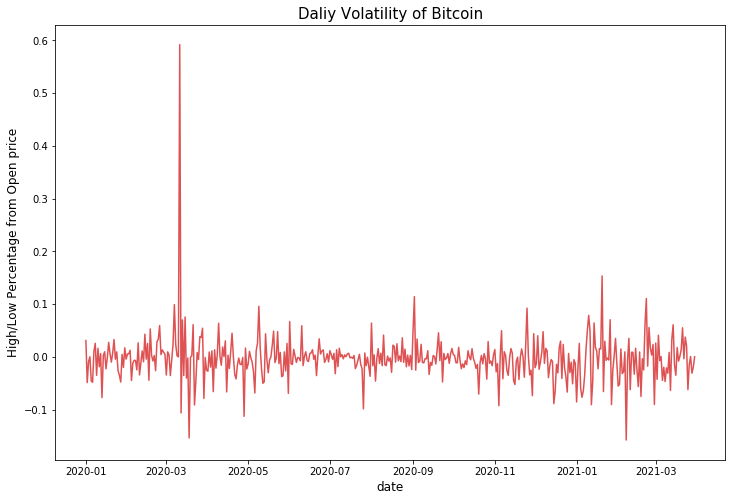

In [17]:
df['daily_pct_chg'] = df['close'].pct_change()
btc_df = df.copy()
btc_df = btc_df[btc_df['ticker'] == 'BTC']
btc_df = btc_df[btc_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(btc_df['daily_pct_chg'])}")
print(f"BTC Percent Change Standard Deviation: {np.std(btc_df['daily_pct_chg'])}")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=btc_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[3], ax=ax)
plt.title('Daliy Volatility of Bitcoin', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $7200.17; Last Price: $58917.69
Change in Price (Amount): $51717.52
Change in Price (Percentage): 718.28%


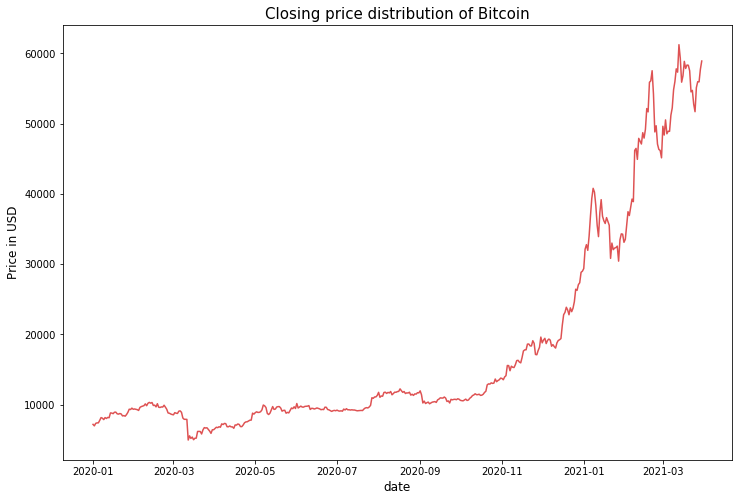

In [18]:
starting_value = btc_df[btc_df['date'] == min(btc_df['date'])]['close'].iloc[0]
final_value = btc_df[btc_df['date'] == max(btc_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=btc_df, x='date', y='close', alpha=0.8, color=color[3], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of Bitcoin', fontsize=15)
plt.show()

## ETH

Average Percent Change -0.004420819417141841
ETH Percent Change Standard Deviation: 0.058705130501045366


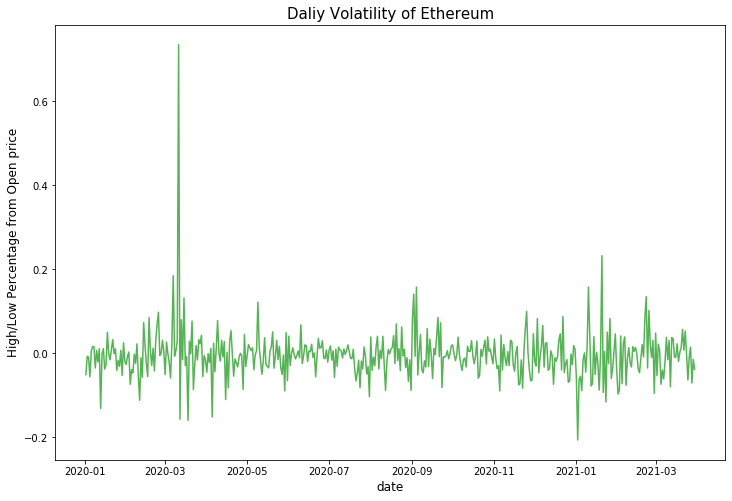

In [19]:
eth_df = df.copy()
eth_df = eth_df[eth_df['ticker'] == 'ETH']
eth_df = eth_df[eth_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(eth_df['daily_pct_chg'])}")
print(f"ETH Percent Change Standard Deviation: {np.std(eth_df['daily_pct_chg'])}")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=eth_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[2], ax=ax)
plt.title('Daliy Volatility of Ethereum', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $127.41; Last Price: $1846.03
Change in Price (Amount): $1718.62
Change in Price (Percentage): 1348.89%


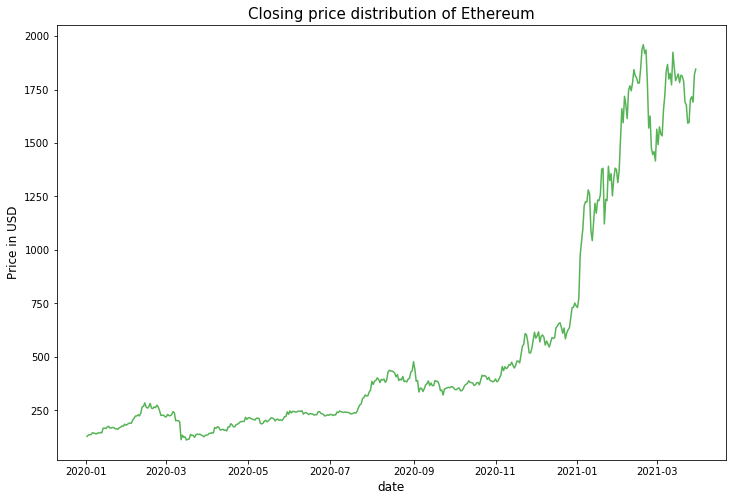

In [20]:
starting_value = eth_df[eth_df['date'] == min(eth_df['date'])]['close'].iloc[0]
final_value = eth_df[eth_df['date'] == max(eth_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=eth_df, x='date', y='close', alpha=0.8, color=color[2], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of Ethereum', fontsize=15)
plt.show()

## LTC

Average Percent Change -0.0020301164917774814
LTC Percent Change Standard Deviation: 0.05642735314960416


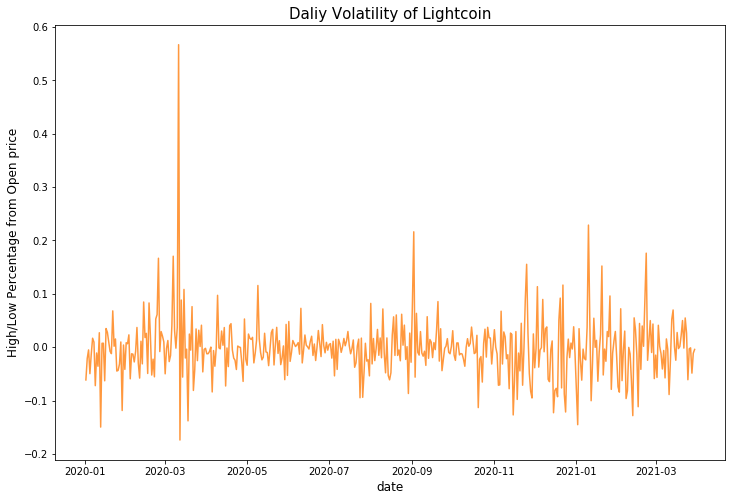

In [21]:
ltc_df = df.copy()
ltc_df = ltc_df[ltc_df['ticker'] == 'LTC']
ltc_df = ltc_df[ltc_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(ltc_df['daily_pct_chg'])}")
print(f"LTC Percent Change Standard Deviation: {np.std(ltc_df['daily_pct_chg'])}")


fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ltc_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[1], ax=ax)
plt.title('Daliy Volatility of Lightcoin', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $39.82; Last Price: $196.68
Change in Price (Amount): $156.86
Change in Price (Percentage): 393.92%


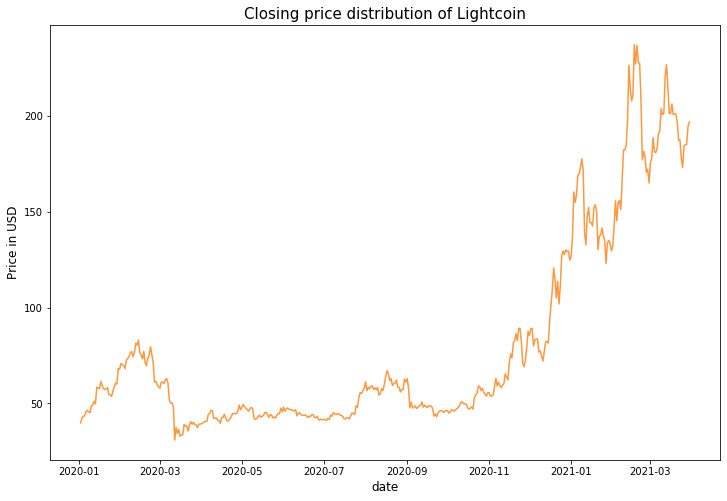

In [22]:
starting_value = ltc_df[ltc_df['date'] == min(ltc_df['date'])]['close'].iloc[0]
final_value = ltc_df[ltc_df['date'] == max(ltc_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ltc_df, x='date', y='close', alpha=0.8, color=color[1], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of Lightcoin', fontsize=15)
plt.show()

## ADA

Average Percent Change -0.0038314914025980628
ADA Percent Change Standard Deviation: 0.09601379139121333


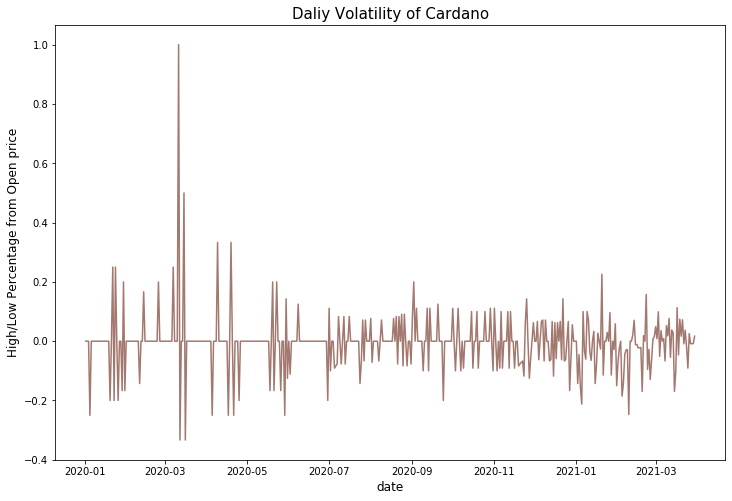

In [23]:
ada_df = df.copy()
ada_df = ada_df[ada_df['ticker'] == 'ADA']
ada_df = ada_df[ada_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(ada_df['daily_pct_chg'])}")
print(f"ADA Percent Change Standard Deviation: {np.std(ada_df['daily_pct_chg'])}")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ada_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[5], ax=ax)
plt.title('Daliy Volatility of Cardano', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $0.03; Last Price: $1.21
Change in Price (Amount): $1.18
Change in Price (Percentage): 3933.33%


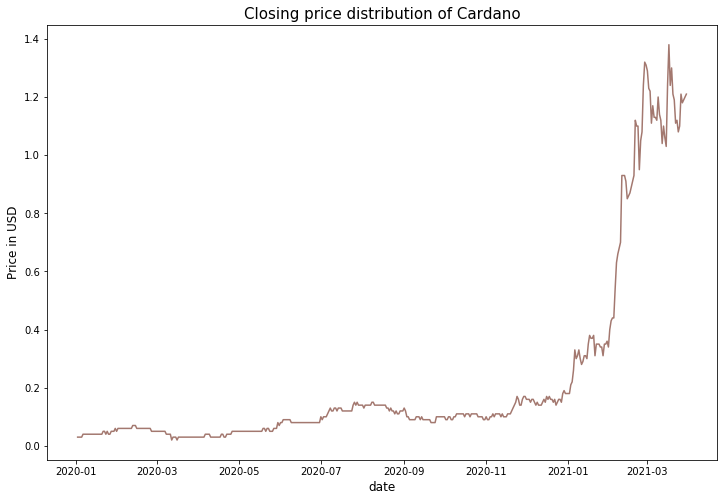

In [24]:
starting_value = ada_df[ada_df['date'] == min(ada_df['date'])]['close'].iloc[0]
final_value = ada_df[ada_df['date'] == max(ada_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ada_df, x='date', y='close', alpha=0.8, color=color[5], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of Cardano', fontsize=15)
plt.show()

## XRP

Average Percent Change 3.743598226888151e-05
XRP Percent Change Standard Deviation: 0.07239111377053299


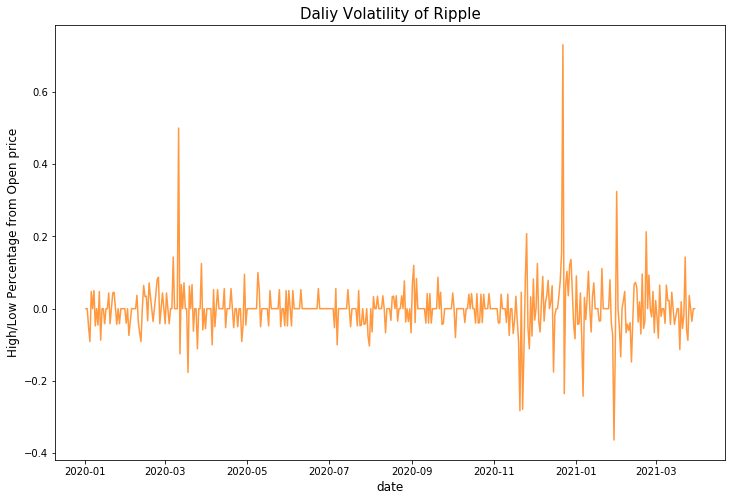

In [25]:
xrp_df = df.copy()
xrp_df = xrp_df[xrp_df['ticker'] == 'XRP']
xrp_df = xrp_df[xrp_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(xrp_df['daily_pct_chg'])}")
print(f"XRP Percent Change Standard Deviation: {np.std(xrp_df['daily_pct_chg'])}")


fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=xrp_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[1], ax=ax)
plt.title('Daliy Volatility of Ripple', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $0.19; Last Price: $0.57
Change in Price (Amount): $0.38
Change in Price (Percentage): 200.0%


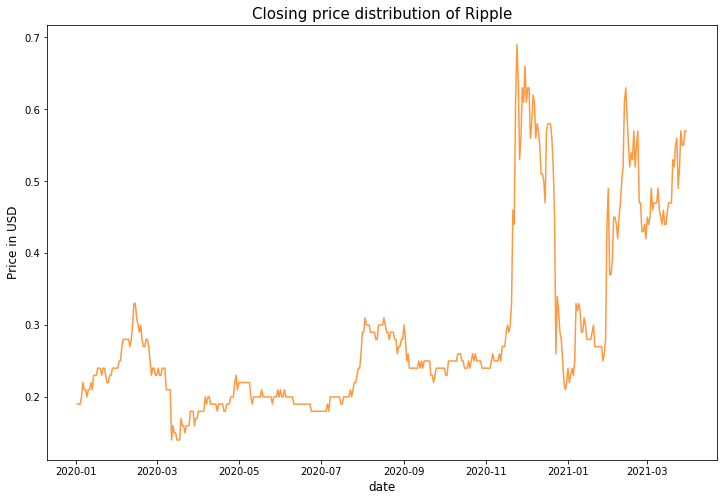

In [26]:
starting_value = xrp_df[xrp_df['date'] == min(xrp_df['date'])]['close'].iloc[0]
final_value = xrp_df[xrp_df['date'] == max(xrp_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=xrp_df, x='date', y='close', alpha=0.8, color=color[1], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of Ripple', fontsize=15)
plt.show()

## DJI

Average Percent Change 0.0006945797296117104
DJI Percent Change Standard Deviation: 0.02114818567265003


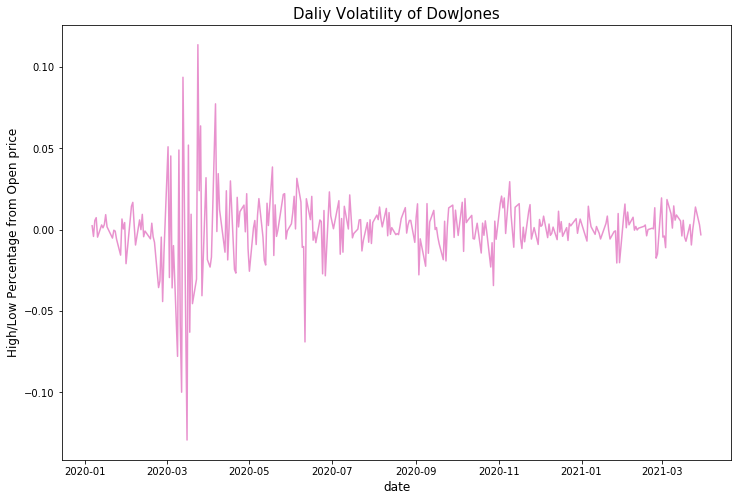

In [27]:
dji_df = df.copy()
dji_df = dji_df[dji_df['ticker'] == 'DJI']
dji_df = dji_df[pd.Timestamp(2020, 1, 3) < dji_df['date']] 
dji_df = dji_df[dji_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(dji_df['daily_pct_chg'])}")
print(f"DJI Percent Change Standard Deviation: {np.std(dji_df['daily_pct_chg'])}")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=dji_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[6], ax=ax)
plt.title('Daliy Volatility of DowJones', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $28703.38; Last Price: $33066.96
Change in Price (Amount): $4363.58
Change in Price (Percentage): 15.2%


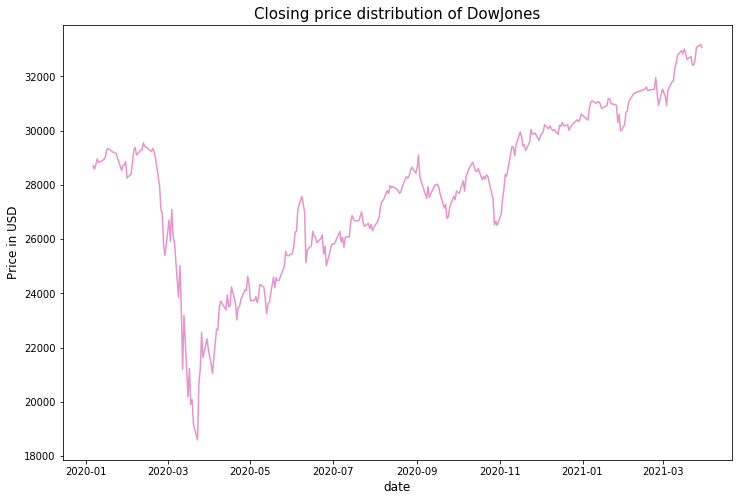

In [28]:
starting_value = dji_df[dji_df['date'] == min(dji_df['date'])]['close'].iloc[0]
final_value = dji_df[dji_df['date'] == max(dji_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=dji_df, x='date', y='close', alpha=0.8, color=color[6], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of DowJones', fontsize=15)
plt.show()

# GSPC

Average Percent Change 0.0008586479571599996
GSPC Percent Change Standard Deviation: 0.019949712601863637


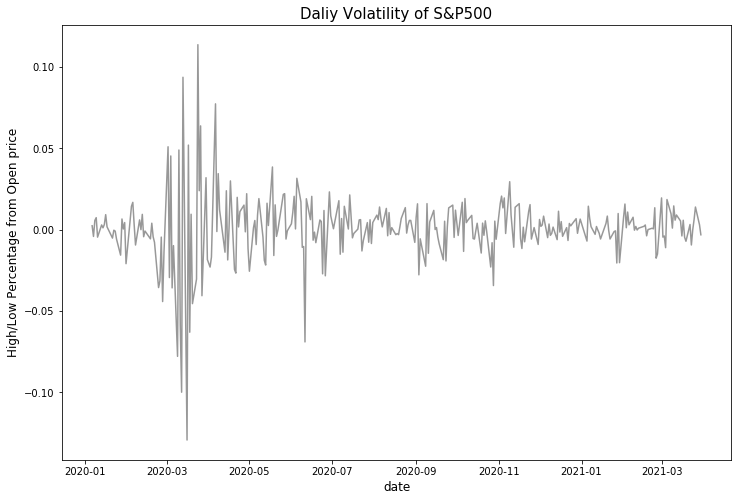

In [29]:
gspc_df = df.copy()
gspc_df = gspc_df[gspc_df['ticker'] == 'GSPC']
gspc_df = gspc_df[pd.Timestamp(2020, 1, 3) < gspc_df['date']] 
gspc_df = gspc_df[gspc_df['date'] < pd.Timestamp(2021, 3, 31)]

print(f"Average Percent Change {np.mean(gspc_df['daily_pct_chg'])}")
print(f"GSPC Percent Change Standard Deviation: {np.std(gspc_df['daily_pct_chg'])}")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=dji_df, x='date', y='daily_pct_chg', alpha=0.8, color=color[7], ax=ax)
plt.title('Daliy Volatility of S&P500', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('High/Low Percentage from Open price', fontsize=12)
plt.show()

First Price: $3246.28; Last Price: $3958.55
Change in Price (Amount): $712.27
Change in Price (Percentage): 21.94%


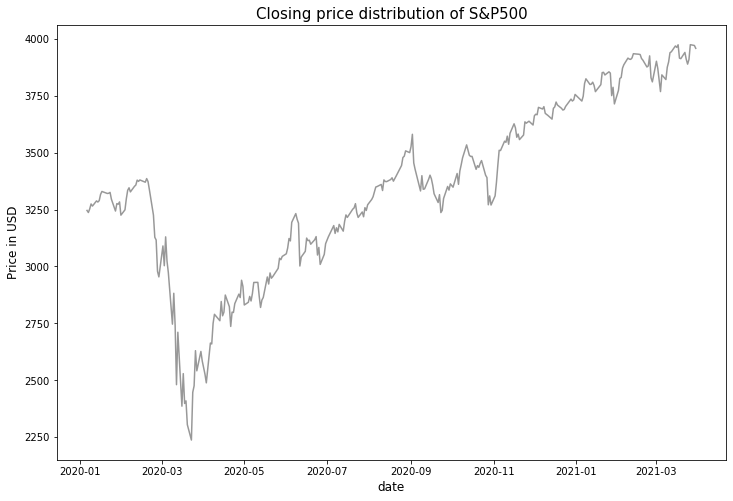

In [30]:
starting_value = gspc_df[gspc_df['date'] == min(gspc_df['date'])]['close'].iloc[0]
final_value = gspc_df[gspc_df['date'] == max(gspc_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=gspc_df, x='date', y='close', alpha=0.8, color=color[7], ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title('Closing price distribution of S&P500', fontsize=15)
plt.show()

In [31]:
combo_df = pd.concat([dji_df, btc_df])

alt.Chart(combo_df).mark_point(filled=True).encode(
    x=alt.X(
        'date:T',
        axis=alt.Axis(title=None)
    ),
    y=alt.Y(
        'daily_pct_chg',
        axis=alt.Axis(
            title='Change in Value (%)',
            values=[i*0.05 for i in range(-4, 13)],
            format='%'
        )
    ),
    color=alt.Color(
        'ticker:N',
        legend=alt.Legend(title='Ticker')
    )
).configure_mark(
    opacity=0.5
).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
).properties(
    height=600,
    title='Daily Volatility: Bitcoin vs. Dow Jones'
).configure_title(
    fontSize=20,
    dy=-10
)

alt.Chart(...)

In [32]:
combo_df2 = pd.concat([gspc_df, eth_df])

alt.Chart(combo_df2).mark_point(filled=True).encode(
    x=alt.X(
        'date:T',
        axis=alt.Axis(title=None)
    ),
    y=alt.Y(
        'daily_pct_chg',
        axis=alt.Axis(
            title='Change in Value (%)',
            values=[i*0.05 for i in range(-5, 16)],
            format='%'
        )
    ),
    color=alt.Color(
        'ticker:N',
        legend=alt.Legend(title='Ticker')
    )
).configure_mark(
    opacity=0.5
).configure_axis(
    grid=False
).configure_view(
    strokeOpacity=0
).properties(
    height=600,
    title='Daily Volatility: Ethereum vs. S&P 500'
).configure_title(
    fontSize=20,
    dy=-10
)

alt.Chart(...)

# Interactive Graph

In [33]:
dji_df = df.copy()
dji_df = dji_df[dji_df['ticker'] == 'DJI']
dji_df = dji_df[pd.Timestamp(2020, 1, 3) < dji_df['date']] 
dji_df = dji_df[dji_df['date'] < pd.Timestamp(2021, 3, 31)]

starting_value = dji_df[dji_df['date'] == min(dji_df['date'])]['close'].iloc[0]
final_value = dji_df[dji_df['date'] == max(dji_df['date'])]['close'].iloc[0]
percentage_change = (final_value - starting_value) / abs(starting_value) * 100

print(f"First Price: ${starting_value}; Last Price: ${final_value}")
print(f"Change in Price (Amount): ${round(final_value - starting_value, 4)}")
print(f"Change in Price (Percentage): {round(percentage_change, 2)}%")

# Chart Logic
nearest = alt.selection(type='single', nearest=True, on='mouseover', fields=['date'], empty='none')

line = alt.Chart(dji_df).mark_line().encode(
    x='date:T',
    y='close:Q'
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(dji_df).mark_point().encode(
    x='date:T',
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = line.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = line.mark_text(align='left', dx=5, dy=30).encode(
    text=alt.condition(nearest, 'close:Q', alt.value(' '))
).transform_calculate(label="datum.y")

# Draw a rule at the location of the selection
rules = alt.Chart(dji_df).mark_rule(color='gray').encode(
    x='date:T',
).transform_filter(
    nearest
)

alt.layer(
    line, selectors, points, rules, text
).properties(
    width=600, height=300
)

First Price: $28703.38; Last Price: $33066.96
Change in Price (Amount): $4363.58
Change in Price (Percentage): 15.2%


alt.LayerChart(...)

In [34]:
combo_df = pd.concat([dji_df, btc_df])

# Best Investment During COVID-19 Crash

In [35]:
coronavirus_crash_date = '2020-03-23'
sell_date = '2021-03-23'

def get_return_pct(df: pd.DataFrame, buy_date: str, sell_date: str) -> float:
    """"""
    buy_price = df[df['date'] == buy_date]['close'].iloc[0]
    print(f"Buy: {buy_price}")
    sell_price = df[df['date'] == sell_date]['close'].iloc[0]
    print(f"Sell: {sell_price}")
    
#     percentage_change = (sell_price - buy_price) / abs(buy_price) * 100
    return round((sell_price - buy_price) / abs(buy_price), 5)

tickers = {
    'BTC': {'df': btc_df, 'type': 'Crypto'},
    'ETH': {'df': eth_df, 'type': 'Crypto'},
    'LTC': {'df': ltc_df, 'type': 'Crypto'},
    'ADA': {'df': ada_df, 'type': 'Crypto'},
    'XRP': {'df': xrp_df, 'type': 'Crypto'},
    'DJI': {'df': dji_df, 'type': 'Stock'},
    'GSPC': {'df': gspc_df, 'type': 'Stock'}
}

data = {
    'ticker': [t for t in tickers], 
    'roi_pct': [], 
    'roi': [], 
    'initial_investment': [], 
    'type': [tickers[t]['type'] for t in tickers]
}

investment_amount = 1000
for ticker, info in tickers.items():
    print(f"{ticker} ---")
    roi_pct = get_return_pct(info['df'], coronavirus_crash_date, sell_date)
    roi = round(investment_amount + (investment_amount * roi_pct), 2)
    print(f"Buying {ticker} and selling a year later: {round(roi_pct * 100, 2)}%")
    print(f"${investment_amount} investment would yield ${roi}")
    data['roi_pct'].append(roi_pct)
    data['roi'].append(roi)
    data['initial_investment'].append(investment_amount)

BTC ---
Buy: 6416.31
Sell: 54738.94
Buying BTC and selling a year later: 753.12%
$1000 investment would yield $8531.22
ETH ---
Buy: 134.91
Sell: 1678.65
Buying ETH and selling a year later: 1144.27%
$1000 investment would yield $12442.74
LTC ---
Buy: 38.77
Sell: 187.39
Buying LTC and selling a year later: 383.34%
$1000 investment would yield $4833.38
ADA ---
Buy: 0.03
Sell: 1.12
Buying ADA and selling a year later: 3633.33%
$1000 investment would yield $37333.33
XRP ---
Buy: 0.16
Sell: 0.56
Buying XRP and selling a year later: 250.0%
$1000 investment would yield $3500.0
DJI ---
Buy: 18591.93
Sell: 32423.15
Buying DJI and selling a year later: 74.39%
$1000 investment would yield $1743.94
GSPC ---
Buy: 2237.4
Sell: 3910.52
Buying GSPC and selling a year later: 74.78%
$1000 investment would yield $1747.8


In [36]:
roi_df = pd.DataFrame(data)

slider = alt.binding_range(min=0, max=100000, step=500, name='Investment Amount:')
selector = alt.selection_single(name='investment', fields=['amount'], bind=slider, init={'amount': 500})

roi_bar = alt.Chart(roi_df).mark_bar().encode(
    x=alt.X(
        'ticker:N',
        sort='-y',
        axis=alt.Axis(title='Investment Ticker')
    ),
    y=alt.Y(
        'roi:Q',
        axis=alt.Axis(format='$,.0f', title='Return on Investment')
    ),
    color='type:N',
    order='roi:Q'
).add_selection(
    selector
).properties(
    width=250,
    height=600
)

roi_bar = alt.Chart(roi_df).mark_bar().add_selection(
    selector
).transform_calculate(
    return_on_investment='datum.roi_pct * investment.amount'
).encode(
    x=alt.X(
        'ticker:N',
        sort='-y',
        axis=alt.Axis(title='Investment Ticker')
    ),
    y=alt.Y(
        'return_on_investment:Q',
        axis=alt.Axis(format='$,.0f', title='Return on Investment')
    ),
    color=alt.Color(
        'type:N',
        legend=alt.Legend(title='Type')
    ),
    order='roi:Q'
).configure_axis(
    titleFontSize=16,
    titlePadding=10
).properties(
    width=250,
    height=500
)

roi_bar

alt.Chart(...)

In [37]:
df[df['date']=='2020-01-03']

,close,date,high,low,norm_close,open,ticker,volume,daily_pct_chg
453,0.03,2020-01-03,0.03,0.03,0.007353,0.03,ADA,3.016264e+07,0.000000
453,7344.88,2020-01-03,7413.72,6915.00,0.042189,6984.43,BTC,2.811148e+10,-0.008876
453,134.17,2020-01-03,134.55,126.49,0.012738,127.41,ETH,1.047685e+10,-0.006663
453,42.42,2020-01-03,42.45,39.45,0.055766,39.86,LTC,3.260961e+09,-0.021002
453,0.19,2020-01-03,0.19,0.19,0.090909,0.19,XRP,1.270017e+09,0.000000
0,28634.88,2020-01-03,28716.31,28500.36,0.688843,28553.33,DJI,2.395900e+06,150708.894737
0,3234.85,2020-01-03,3246.15,3222.34,0.574191,3226.36,GSPC,3.461290e+09,-0.901919


In [38]:
# close pirce per assets 2020/01/03

ETH_begin_price = 134.17
ADA_begin_price = 0.03
LTC_begin_price = 42.42
XRP_begin_price = 0.19
GSPC_begin_price = 3226.36
DJI_begin_price = 28634.88
BTC_begin_price = 7344.88

# Add column to check the relative close price per day from the 2020/01/03 

eth_df['price/begin'] = eth_df['close'] / ETH_begin_price
ada_df['price/begin'] = ada_df['close'] / ADA_begin_price
ltc_df['price/begin'] = ltc_df['close'] / LTC_begin_price
xrp_df['price/begin'] = xrp_df['close'] / XRP_begin_price
gspc_df['price/begin'] = gspc_df['close'] / GSPC_begin_price
btc_df['price/begin'] = btc_df['close'] / BTC_begin_price
dji_df['price/begin'] = dji_df['close'] / DJI_begin_price

# Merge altcoin to dataframe 

df2 = pd.concat([eth_df, ada_df, ltc_df, xrp_df, btc_df, dji_df, gspc_df ])


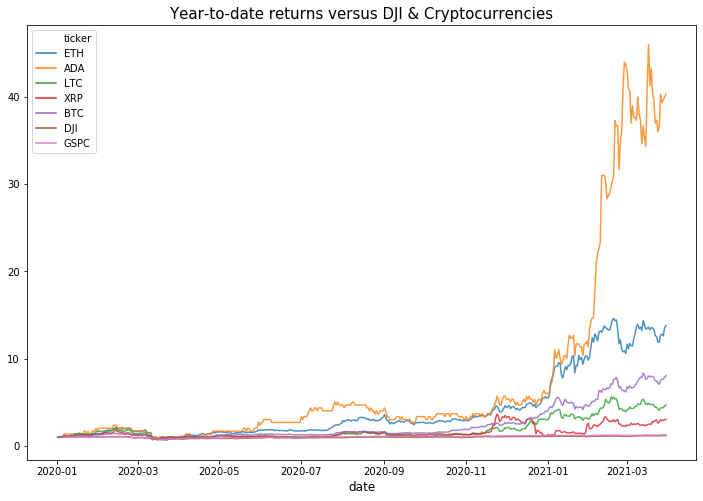

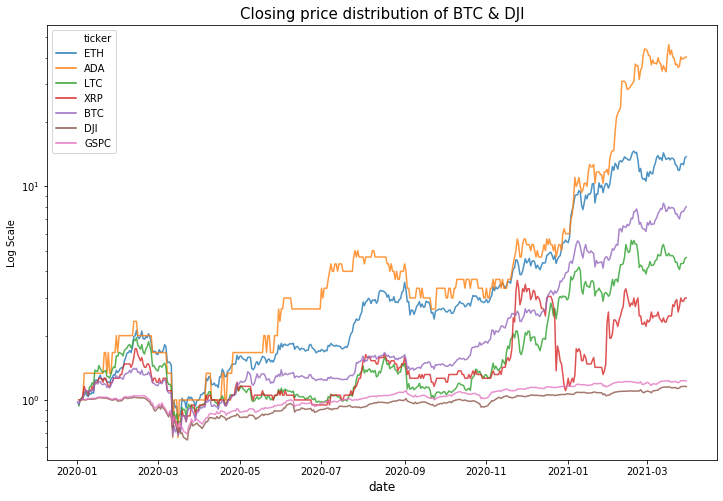

In [39]:
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df2, x='date', y='price/begin', alpha=0.8, hue='ticker', ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('')
plt.title('Year-to-date returns versus Stock & Cryptocurrency', fontsize=15)

# Use log-scale y axis in order to remove deviation of cardano 

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=df2, x='date', y='price/begin', alpha=0.8, hue='ticker', ax=ax)
plt.xlabel('date', fontsize=12)
plt.ylabel('Log Scale')
plt.title('Year-to-date returns versus Stock & Cryptocurrency', fontsize=15)
plt.yscale('log') 
plt.show()

plt.show()

Although there are differences in price fluctuations, correlation analysis seems necessary because it shows similar patterns.

In [40]:
df3 = df.pivot(index='date', columns='ticker', values='close')

df3.corr()

ticker,ADA,BTC,DJI,ETH,GSPC,LTC,XRP
ticker,,,,,,,
ADA,1.000000,0.936895,0.640052,0.914404,0.661526,0.890277,0.663096
BTC,0.936895,1.000000,0.746190,0.984333,0.782845,0.978533,0.714312
DJI,0.640052,0.746190,1.000000,0.741010,0.976714,0.761724,0.709530
ETH,0.914404,0.984333,0.741010,1.000000,0.792340,0.967274,0.712948
GSPC,0.661526,0.782845,0.976714,0.792340,1.000000,0.783174,0.734371
LTC,0.890277,0.978533,0.761724,0.967274,0.783174,1.000000,0.714869
XRP,0.663096,0.714312,0.709530,0.712948,0.734371,0.714869,1.000000


Text(0.5, 1, 'DJI & Cryptocurrencies Correlation matrix')

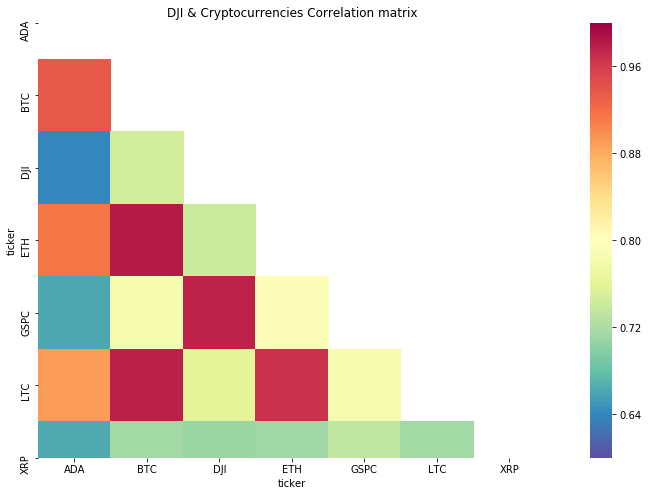

In [41]:
plt.figure(figsize=(16,8))
corrs = df3.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=0.6, vmax=1)
plt.title('DJI & Cryptocurrencies Correlation matrix')

## Analyze Variability and Risk

Let's analyze the variability because we think the high yield will be due to the high volatility.

In [42]:
# Create high_pct and low_pct columns by calculate other columns 

df['high_pct'] = (df['high'] - df['open']) / df['open'] * 100
df['low_pct'] = (df['low'] - df['open']) / df['open'] * 100

df.head( )

,close,date,high,low,norm_close,open,ticker,volume,daily_pct_chg,high_pct,low_pct
0,1.19,2021-03-31,1.21,1.17,0.860294,1.21,ADA,3.190464e+09,NaN,0.000000,-3.305785
1,1.21,2021-03-30,1.23,1.19,0.875000,1.20,ADA,2.517423e+09,0.016807,2.500000,-0.833333
2,1.20,2021-03-29,1.23,1.18,0.867647,1.19,ADA,2.554597e+09,-0.008264,3.361345,-0.840336
3,1.19,2021-03-28,1.22,1.17,0.860294,1.18,ADA,2.397009e+09,-0.008333,3.389831,-0.847458
4,1.18,2021-03-27,1.24,1.16,0.852941,1.21,ADA,3.106871e+09,-0.008403,2.479339,-4.132231


In [46]:
df4 = df[df['ticker'].isin(['BTC', 'DJI'])]

df4.head()

,close,date,high,low,norm_close,open,ticker,volume,daily_pct_chg,high_pct,low_pct
0,58918.83,2021-03-31,59930.03,57726.42,0.958696,58930.28,BTC,6.552083e+10,1.963960e+06,1.696496,-2.042855
1,58917.69,2021-03-30,59447.22,57251.55,0.958676,57750.13,BTC,5.441412e+10,-1.934865e-05,2.938677,-0.863340
2,57750.20,2021-03-29,58342.10,55139.34,0.937929,55947.90,BTC,5.762559e+10,-1.981561e-02,4.279338,-1.445202
3,55950.75,2021-03-28,56610.31,55071.11,0.905951,55974.94,BTC,4.768658e+10,-3.115920e-02,1.135097,-1.614705
4,55973.51,2021-03-27,56568.22,54242.91,0.906356,55137.57,BTC,4.726654e+10,4.067863e-04,2.594692,-1.622596


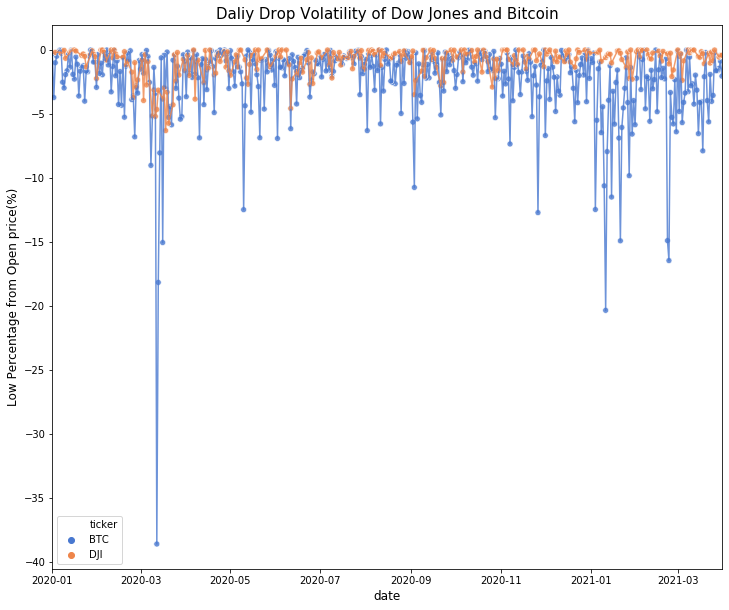

In [48]:
# Visualize daily Lowest pct per assets

fig, ax = plt.subplots(figsize=(12,10))

sns.scatterplot(data=df4, x='date', y='low_pct', hue='ticker', alpha=0.8, palette='muted', ax=ax)
ax.set_xlim(df4['date'].min(), df4['date'].max())


sns.lineplot(data=df4, x='date', y='low_pct', hue='ticker', alpha=0.8, palette='muted', ax=ax, legend=None)
plt.title('Daliy Drop Volatility of Dow Jones and Bitcoin', fontsize=15)
plt.xlabel('date', fontsize=12)
plt.ylabel('Low Percentage from Open price(%)', fontsize=12)

plt.show()